## Tutorial 10 
Tom Carron, Timon Danowski, Clara Kretzschmar

## 1D Sedov blast wave

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from ex9 import *
matplotlib.rcParams["figure.dpi"]=300

In [2]:
N = 200
a, b = -10, 10 # Domain size
size=1.0 #'radius' of central high pressure region
density_1, density_2 = 1, 1
pressure_1, pressure_2 = 100, 1.0
momentum_1, momentum_2 = 0, 0
t_max = 0.6
gamma = 1.4

# w = [rho, vx, vy, vz, p]
w_1 = [density_1, momentum_1, momentum_1, momentum_1, pressure_1]
w_2 = [density_2, momentum_2, momentum_2, momentum_2, pressure_2]

Text(0, 0.5, 'density')

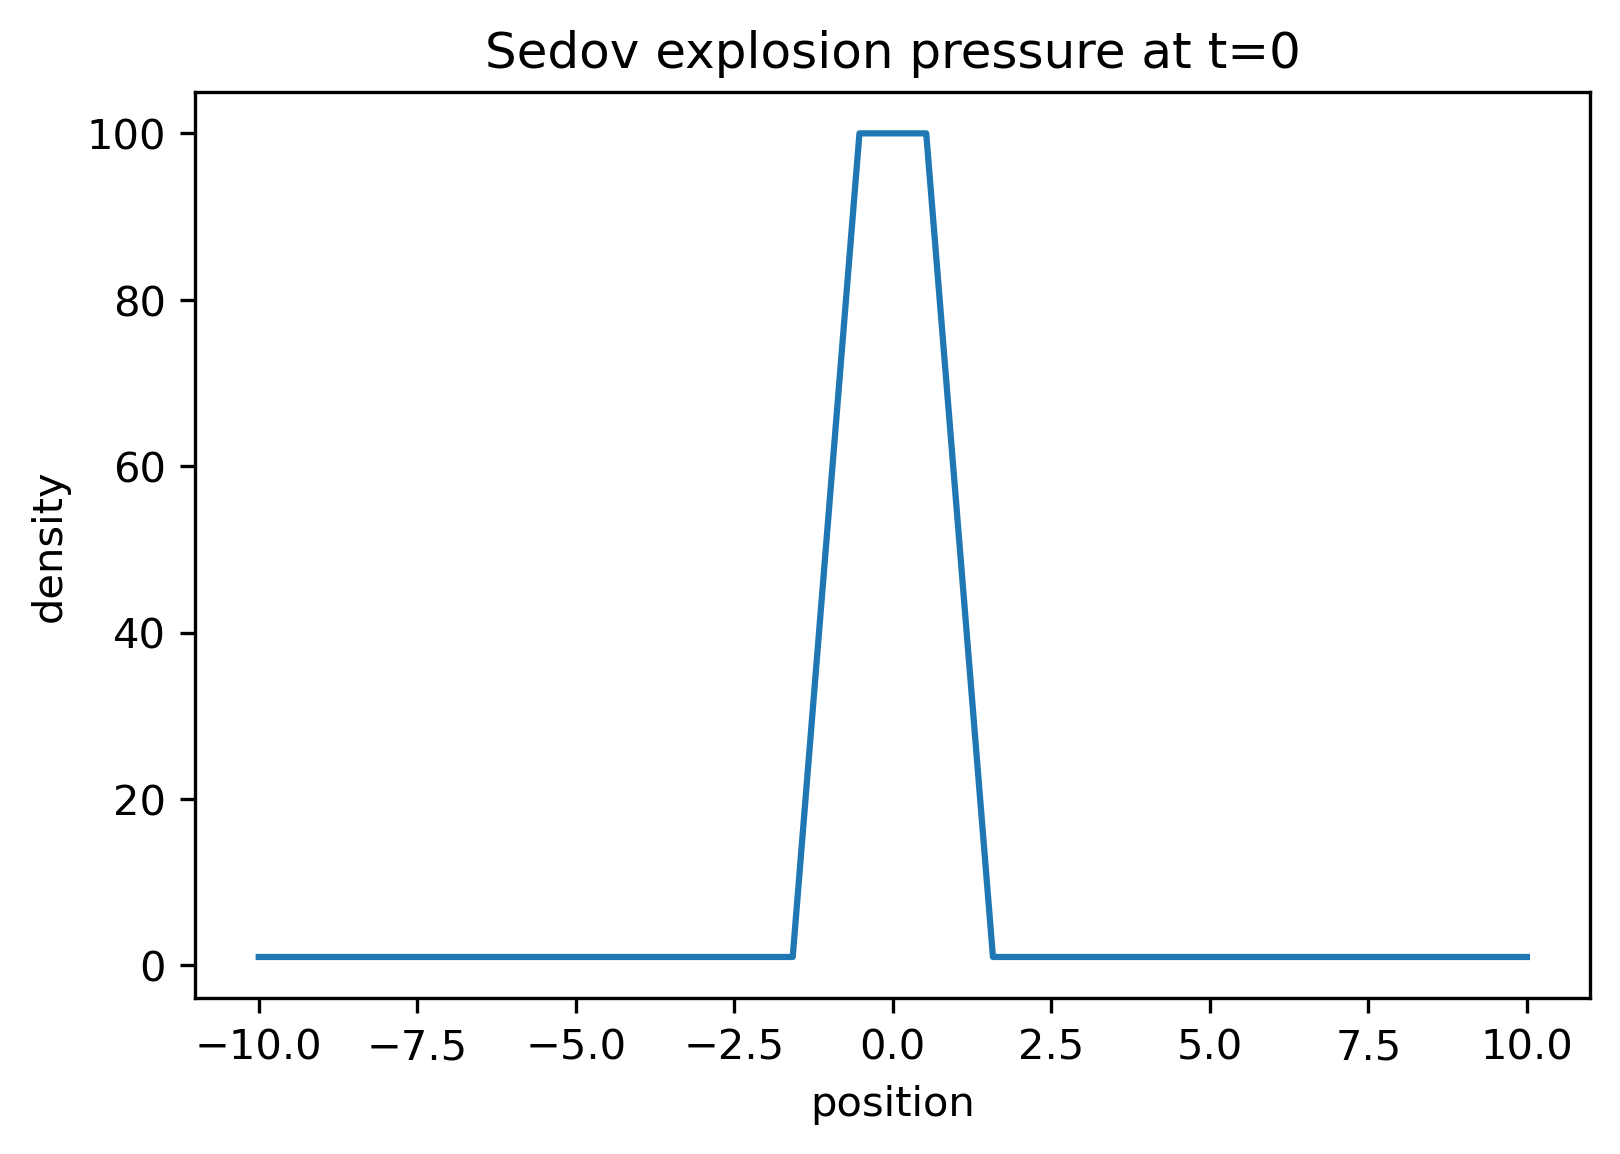

In [3]:
#Plot of initial setup
N=20
q=sedov_init(a, b, N, q_function(w_1, gamma), q_function(w_2, gamma), size)
w=np.zeros_like(q)
for k in range(N):
    w[k]=invert_q(q[k],gamma)
plt.plot(np.linspace(a, b, N),w[:,4])
plt.title("Sedov explosion pressure at t=0")
plt.xlabel("position")
plt.ylabel("density")

In [4]:
#Run simulation for different resolutions to t=0.6 and plot density velocity and pressure
Ns=[20,100,1000]
densities=[]
x_velocities=[]
pressures=[]
for i in range(len(Ns)):
    densities.append(np.zeros(Ns[i]))
    x_velocities.append(np.zeros(Ns[i]))
    pressures.append(np.zeros(Ns[i]))
    q=run(Ns[i], a, b, size, gamma, w_1, w_2, t_max,'sedov')
    w=np.zeros_like(q)
    for k in range(Ns[i]):
        w[k]=invert_q(q[k],gamma)
    densities[i]=w[:,0]
    x_velocities[i]=q[:,1]
    pressures[i]=w[:,4]

KeyboardInterrupt: 

In [ ]:
for i in range(len(Ns)):
    plt.plot(np.linspace(a, b, Ns[i]), densities[i],label="N = "+str(Ns[i]))
plt.title("Computed density at t = "+str(t_max))
plt.xlabel("position")
plt.ylabel("density")
plt.legend()
plt.grid()
plt.savefig("plots/density.png",dpi=300,bbox_inches="tight")

In [ ]:
#x-velocity plot
for i in range(len(Ns)):
    plt.plot(np.linspace(a, b, Ns[i]), x_velocities[i]/densities[i],label="N = "+str(Ns[i]))
plt.title("Computed x velocity at t = "+str(t_max))
plt.xlabel("position")
plt.ylabel("velocity")
plt.legend()
plt.grid()
plt.savefig("plots/x_velocity.png",dpi=300,bbox_inches="tight")

In [ ]:
for i in range(len(Ns)):
    plt.plot(np.linspace(a, b, Ns[i]), pressures[i],label="N = "+str(Ns[i]))
plt.title("Computed pressure at t = "+str(t_max))
plt.xlabel("position")
plt.ylabel("pressure")
plt.legend()
plt.grid()
plt.savefig("plots/pressure.png",dpi=300,bbox_inches="tight")

## Time evolution

In [ ]:
N=1000
qs,ts=time_evo(N, a, b, size, gamma, w_1, w_2, t_max,'sedov',interval=0.1)
ts=np.round(ts,2)

In [ ]:
ts=np.round(ts,2)
print(qs.shape)

In [ ]:
fig,axs=plt.subplots(3,figsize=(5,8),sharex=True)
#densities=[]
#x_velocities=[]
#pressures=[]
for i in range(len(ts)):
    t=ts[i]
    q=qs[:,:,i]
    #print(q.shape)
    w=np.zeros_like(q)
    for k in range(N):
        w[k]=invert_q(q[k],gamma)
    densities=w[:,0]
    x_velocities=q[:,1]
    pressures=w[:,4]
    axs[0].plot(np.linspace(a, b, N), densities,color=str(i/len(ts)),label="t = "+str(t))
    axs[1].plot(np.linspace(a, b, N), x_velocities,color=str(i/len(ts)),label="t = "+str(t))
    axs[2].plot(np.linspace(a, b, N), pressures,color=str(i/len(ts)),label="t = "+str(t))
    axs[2].set_xlabel("position")
    axs[0].set_ylabel("density")
    axs[1].set_ylabel("x velocity")
    axs[2].set_ylabel("pressue")
    axs[0].legend()
    axs[1].legend()
    axs[2].legend()
plt.savefig("plots/time_evo.png",dpi=300,bbox_inches="tight")
